In [1]:
%matplotlib inline

In [2]:
import itertools
import math
import time

from torchvision.datasets import MNIST
from torch.utils.data import TensorDataset, DataLoader
import torch
from torch import nn
from torch import optim
from torch.autograd import Variable
import numpy as np
from IPython import display
import matplotlib.pyplot as plt

In [3]:
! ls

mnist  MNIST GAN.ipynb	MNIST GAN_teacher.ipynb  result


In [4]:
! mkdir result

mkdir: cannot create directory ‘result’: File exists


### Load Dataset

In [5]:
data = MNIST('mnist', download=True, train=True)
train_data = TensorDataset(data.train_data.view(-1, 28 * 28).float() / 255, data.train_labels)
data = MNIST('mnist', download=True, train=False)
test_data = TensorDataset(data.test_data.view(-1, 28 * 28).float() / 255, data.test_labels)

In [6]:
data = MNIST('mnist', download=True, train=True)
data.train_data.shape
data.train_labels.shape

torch.Size([60000])

### Model

In [18]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        #implement me =) make choosen configuration
    
    def forward(self, x):
        #implement me
        return out

In [19]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        #implement me =) make choosen generator configuration
    
    def forward(self, x):
        # implement me
        return out

In [20]:
discriminator = Discriminator().cuda()
generator = Generator().cuda()

### Optimization

In [21]:
m_loss = # choose loss
lr = 0.0002
d_optimizer = # your favorite optimizer
g_optimizer = # your favorite optimizer - 2

### Training

In [22]:
def train_discriminator(discriminator, images, real_labels, fake_images, fake_labels):
    discriminator.zero_grad()
    
    #implement real loss and fake loss

    d_loss = real_loss + fake_loss
    d_loss.backward()
    d_optimizer.step()
    return d_loss, real_score, fake_score

In [23]:
def train_generator(generator, discriminator_outputs, real_labels):
    
    #implement loss
    
    g_loss.backward()
    g_optimizer.step()
    return g_loss

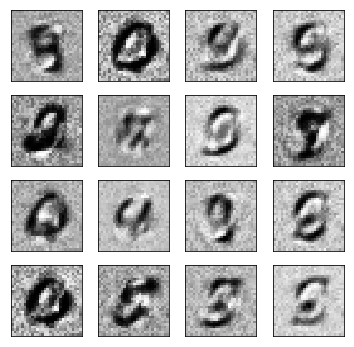

Epoch [8/200], Step[500/1875], d_loss: 0.5385, g_loss: 2.2066, D(x): 0.85, D(G(z)): 0.19


In [ ]:
# beautiful plotting - optional
size_figure_grid = int(math.sqrt(num_test_samples))
fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(6, 6))
for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
    ax[i,j].get_xaxis().set_visible(False)
    ax[i,j].get_yaxis().set_visible(False)


train_loader = DataLoader(train_data, batch_size=32, shuffle=(True))
num_epochs = 200
num_batches = len(train_loader)
num_fig = 0

# prepare validation
num_test_samples = 16
test_noise = Variable(torch.randn(num_test_samples, 100).cuda())


for epoch in range(num_epochs):
    for n, (images, _) in enumerate(train_loader):
        images = Variable(images.cuda())
        real_labels = Variable(torch.ones(images.size(0)).cuda())
        
        # 1. Sample from generator
        # 2. Train the discriminator       
        # 3. Sample again from the generator and get output from discriminator
        # 4. Train the generator

        if (n+1) % 100 == 0:
            test_images = generator(test_noise)
            
            for k in range(num_test_samples):
                i = k//4
                j = k%4
                ax[i,j].cla()
                ax[i,j].imshow(test_images[k,:].data.cpu().numpy().reshape(28, 28), cmap='Greys')
            display.clear_output(wait=True)
            display.display(plt.gcf())
            
            #plt.savefig('results/mnist-gan-%03d.png'%num_fig)
            num_fig += 1
            print('Epoch [%d/%d], Step[%d/%d], d_loss: %.4f, g_loss: %.4f, ' 
                  'D(x): %.2f, D(G(z)): %.2f' 
                  %(epoch + 1, num_epochs, n+1, num_batches, d_loss.data[0], g_loss.data[0],
                    real_score.data.mean(), fake_score.data.mean()))

fig.close()

## Add conditionals

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        # implement me again
    
    def forward(self, x):
        x = x.view(x.size(0), 100)
        out = self.model(x)
        return out

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        #implement me again
    
    def forward(self, x):
        out = self.model(x.view(x.size(0), 784))
        out = out.view(out.size(0), -1)
        return out

In [ ]:
# add conditional to input of generator and discriminator